In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# install kaggle repository
!pip install kaggle

In [3]:
# to upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rsneena","key":"19c43eb3390af48a8fe4c3b02822e7d1"}'}

In [4]:
# kaggle API download libraries
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# downloading the dataset from kaggle
!kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:14<00:00, 76.6MB/s]
100% 1.98G/1.98G [00:16<00:00, 125MB/s] 


In [6]:
# unzipping the dataset to folder
!unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [7]:
import pathlib

In [8]:
# fetching train, test and validation path
train_path=pathlib.Path('/content/train')
test_path=pathlib.Path('/content/test')
validation_path=pathlib.Path('/content/validation')

In [9]:
# function to create train,test and validation dataframe
def create_train_valid_test_df(train_path=train_path,
                               validation_path= validation_path,
                               test_path=test_path):
  #fetching the image path, label of train dataset
  train_image_paths=[str(pathlib.Path(path)) for path in train_path.glob('*/*.jpg')]
  train_image_labels=[pathlib.Path(path).parent.name for path in train_path.glob('*/*.jpg')]
  train_df=pd.DataFrame({'image_path':train_image_paths,'label':train_image_labels})

  #fetching the image path, label of validation dataset
  validation_image_paths=[str(pathlib.Path(path)) for path in validation_path.glob('*/*.jpg')]
  validation_image_labels=[pathlib.Path(path).parent.name for path in validation_path.glob('*/*.jpg')]
  validation_df=pd.DataFrame({'image_path':validation_image_paths,'label':validation_image_labels})

  #fetching the image path, label of test dataset
  test_image_paths=[str(pathlib.Path(path)) for path in test_path.glob('*/*.jpg')]
  test_image_labels=[pathlib.Path(path).parent.name for path in test_path.glob('*/*.jpg')]
  test_df=pd.DataFrame({'image_path':test_image_paths,'label':test_image_labels})

  # printing the number of images in each dataset
  print(f"There are {len(train_df)} images in the training set")
  print(f"There are {len(validation_df)} images in the validation set")
  print(f"There are {len(test_df)} images in the test set")

  return train_df,validation_df,test_df

In [10]:
# calling the dataframe creation function and printing the no of images present in eachdata frame.
train_df,validation_df,test_df=create_train_valid_test_df()

There are 2780 images in the training set
There are 334 images in the validation set
There are 334 images in the test set


In [11]:
train_df.head(150)

,image_path,label
0,/content/train/peas/Image_60.jpg,peas
1,/content/train/peas/Image_67.jpg,peas
2,/content/train/peas/Image_2.jpg,peas
3,/content/train/peas/Image_85.jpg,peas
4,/content/train/peas/Image_93.jpg,peas
...,...,...
145,/content/train/apple/Image_63.jpg,apple
146,/content/train/apple/Image_9.jpg,apple
147,/content/train/apple/Image_51.jpg,apple
148,/content/train/watermelon/Image_67.jpg,watermelon


In [12]:
test_df.head()

,image_path,label
0,/content/test/peas/Image_2.jpg,peas
1,/content/test/peas/Image_10.jpg,peas
2,/content/test/peas/Image_7.jpg,peas
3,/content/test/peas/Image_4.jpg,peas
4,/content/test/peas/Image_5.jpg,peas


In [13]:
validation_df.head()

,image_path,label
0,/content/validation/peas/Image_2.jpg,peas
1,/content/validation/peas/Image_10.jpg,peas
2,/content/validation/peas/Image_7.jpg,peas
3,/content/validation/peas/Image_4.jpg,peas
4,/content/validation/peas/Image_5.jpg,peas


In [14]:
train_images=train_df['image_path'].values
train_labels=train_df['label'].values

In [15]:
train_images

array(['/content/train/peas/Image_60.jpg',
       '/content/train/peas/Image_67.jpg',
       '/content/train/peas/Image_2.jpg', ...,
       '/content/train/sweetcorn/Image_9.jpg',
       '/content/train/sweetcorn/Image_66.jpg',
       '/content/train/sweetcorn/Image_51.jpg'], dtype=object)

In [16]:
test_images=test_df['image_path'].values
test_labels=test_df['label'].values

In [17]:
validation_images=validation_df['image_path'].values
validation_labels=validation_df['label'].values

In [18]:
class_names=sorted([item.name for item in train_path.glob('*')])
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [19]:
img_list=[]
lable_list=[]
for label in class_names:
  for img in (train_path/label).glob('*.jpg'):
    img_list.append(img)
    lable_list.append(label)

In [20]:
df= pd.DataFrame({'image_path':img_list,'label':lable_list})
df.sample(10)

,image_path,label
2155,/content/train/raddish/Image_28.jpg,raddish
1407,/content/train/lettuce/Image_98.jpg,lettuce
1925,/content/train/pineapple/Image_64.jpg,pineapple
2444,/content/train/sweetcorn/Image_1.jpg,sweetcorn
2336,/content/train/spinach/Image_65.jpg,spinach
1349,/content/train/lemon/Image_55.jpg,lemon
1038,/content/train/ginger/Image_3.jpg,ginger
1242,/content/train/kiwi/Image_13.jpg,kiwi
1357,/content/train/lemon/Image_30.jpg,lemon
2527,/content/train/sweetpotato/Image_30.jpg,sweetpotato


In [21]:
df['label'].value_counts()

,count
label,
soy beans,92
peas,90
lettuce,87
spinach,87
turnip,85
grapes,85
beetroot,84
cabbage,84
tomato,84


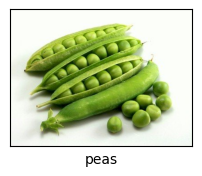

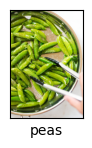

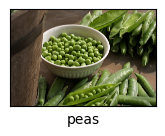

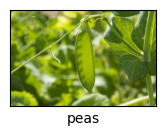

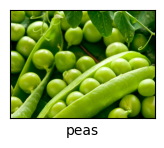

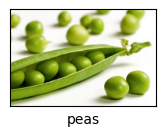

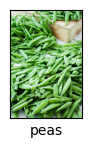

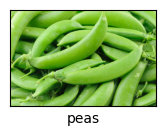

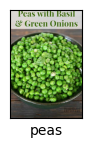

In [22]:
# plotting the images from train dataframe
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(plt.imread(train_df['image_path'][i]))
  plt.xlabel(train_df['label'][i])
  plt.show()


In [ ]:
# Build the CNN

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

# FNN

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3))

In [ ]:
model.summary()

# compile and train the model

In [24]:
train_images.shape

(2780,)

In [25]:
test_images.shape

(334,)

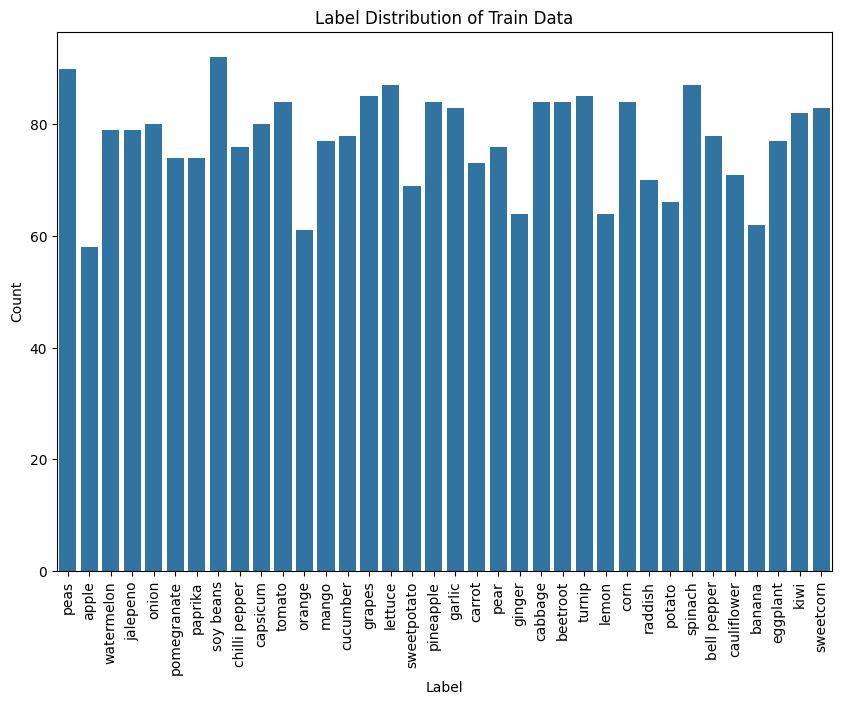

In [23]:
#plotting the train data
import seaborn as sns
plt.figure(figsize = (10, 7))
plt.title("Label Distribution of Train Data")
plt.xlabel("Label")
plt.ylabel("Count")
sns.countplot(data = train_df, x = "label")
plt.xticks(rotation = 90)
plt.show()

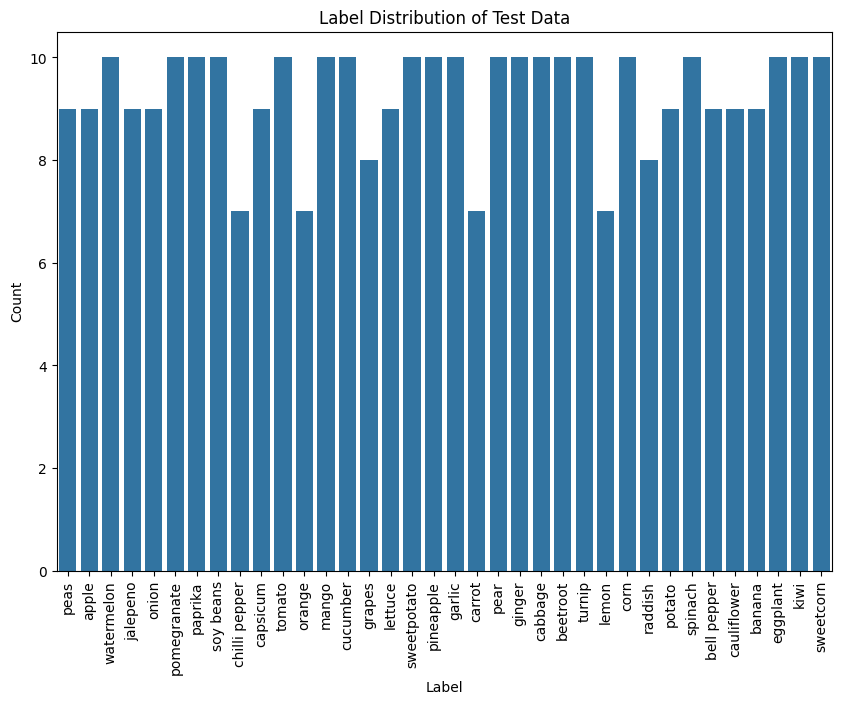

In [26]:
# plotting the test data
plt.figure(figsize = (10, 7))
plt.title("Label Distribution of Test Data")
plt.xlabel("Label")
plt.ylabel("Count")
sns.countplot(data = test_df, x = "label")
plt.xticks(rotation = 90)
plt.show()

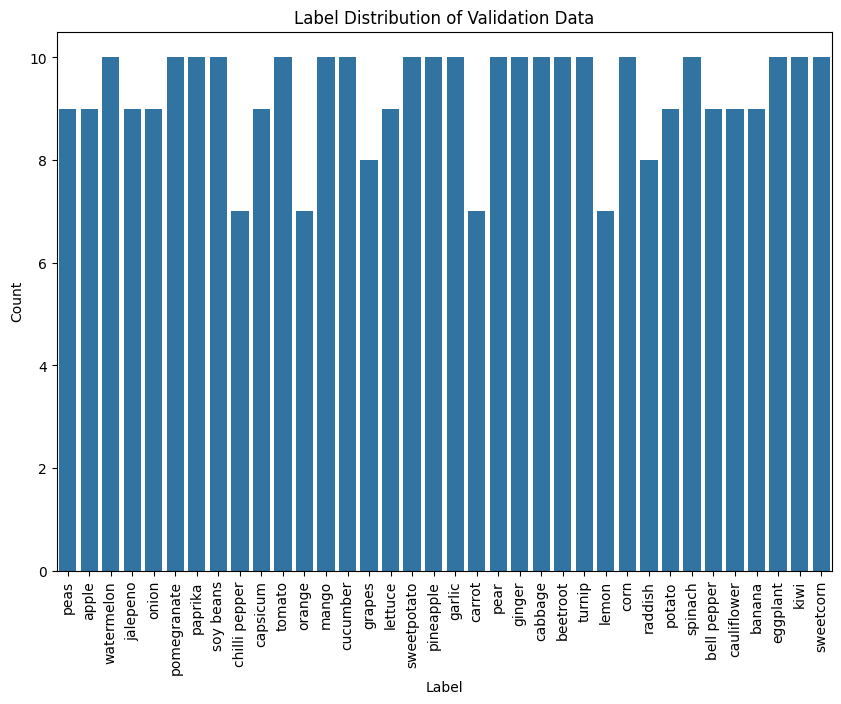

In [27]:
#plotting the validation data
plt.figure(figsize = (10, 7))
plt.title("Label Distribution of Validation Data")
plt.xlabel("Label")
plt.ylabel("Count")
sns.countplot(data = validation_df, x = "label")
plt.xticks(rotation = 90)
plt.show()

Data Preprocessing

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32
IMAGE_SHAPE = (224, 224)

# Create ImageDataGenerator objects
train_datagen = ImageDataGenerator(rescale = 1/255.)
validation_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Create data flows
print("Train data:")
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size = IMAGE_SHAPE,
                                               shuffle = True,
                                               batch_size = BATCH_SIZE)

print("Validation data:")
validation_data = train_datagen.flow_from_directory(validation_path,
                                                    target_size = IMAGE_SHAPE,
                                                    batch_size = BATCH_SIZE)

print("Test data")
test_data = test_datagen.flow_from_directory(test_path,
                                             target_size = IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE)

Train data:
Found 3115 images belonging to 36 classes.
Validation data:
Found 351 images belonging to 36 classes.
Test data
Found 359 images belonging to 36 classes.


In [ ]:
def create_tensorboard_callback(dir_name,
                                experiment_name):
  """
  Creates TensorBoard callback to save model experimentation results
  into related folder.
  """
  log_dir = dir_name + '/' + experiment_name + dt.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f"Saving TensorBoard log files to {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"

In [30]:
import tensorflow_hub as hub

In [29]:
def create_model(model_url,
                 num_classes,
                 image_shape):
  """
  Creates Keras Sequential from model URL.

  Args:
    model_url (str): URL of the model taken from Kaggle.
    num_classes (int): Number of classes to be classified.
    image_shape (Tuple): Input shape of images given in tuple format.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pre-trained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = "feature_extractor_layer",
                                           input_shape = image_shape + (3,))

  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])

  # Return the model
  return model

In [ ]:
import tensorflow_hub as hub

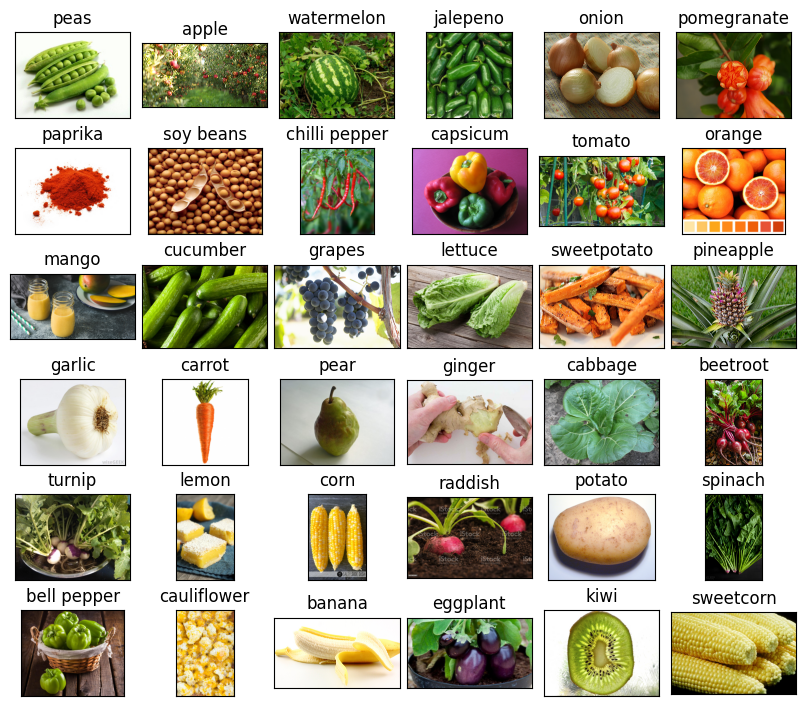

In [31]:
df_unique = train_df.copy().drop_duplicates(subset=["label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.image_path[i]))
    ax.set_title(df_unique.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [42]:
def create_model():
    model = tf.keras.models.Sequential([
        # Input layer with convolution
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.BatchNormalization(),  # Batch Normalization
        tf.keras.layers.MaxPooling2D(2, 2),


        # Additional convolutional layers
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),  # Batch Normalization
        tf.keras.layers.MaxPooling2D(2, 2),


        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),  # Batch Normalization
        tf.keras.layers.MaxPooling2D(2, 2),


        # Flatten the output for the dense layers
        tf.keras.layers.Flatten(),

        # Fully connected layers without regularization
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),  # Batch Normalization
        tf.keras.layers.Dense(64, activation ='relu'), #Keep unchanged
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  # Dropout

        # Output layer
        tf.keras.layers.Dense(36, activation='softmax')  # Use 'softmax' for multi-class classification
    ])

    #Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'Precision', 'Recall']
    )
    return model

model = create_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 52, 52, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,573,316 (21.26 MB)

 Trainable params: 5,572,708 (21.26 MB)

 Non-trainable params: 608 (2.38 KB)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if validation loss doesn't improve for 5 epochs
    restore_best_weights=True,  # Restore the best weights after stopping
    verbose=1
)

In [44]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [58]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_images= test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [61]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
train_images= train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 2780 validated image filenames belonging to 36 classes.


In [66]:
validation_generator= tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
validation_images= validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [65]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# Train the model

In [68]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=validation_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.0442 - loss: 3.7925 - val_accuracy: 0.2904 - val_loss: 3.0721
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.2212 - loss: 3.0622 - val_accuracy: 0.5240 - val_loss: 1.9213
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.4698 - loss: 1.9347 - val_accuracy: 0.7156 - val_loss: 1.0081
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5644 - loss: 1.3960 - val_accuracy: 0.7904 - val_loss: 0.7012
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6835 - loss: 1.0274 - val_accuracy: 0.8293 - val_loss: 0.5793


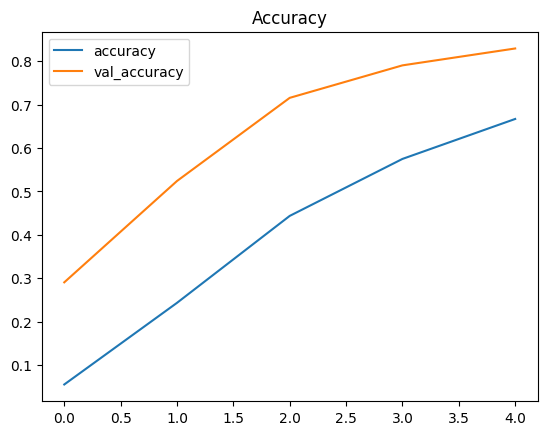

In [72]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

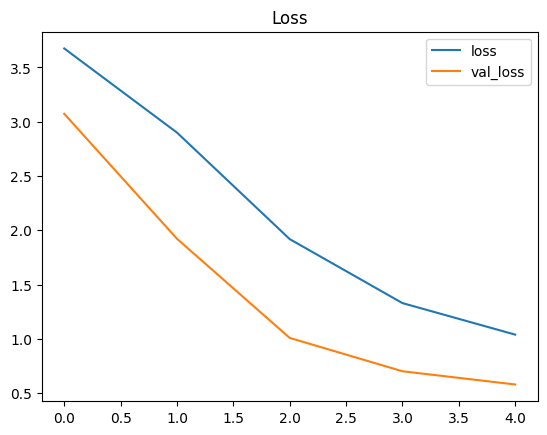

In [73]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# Visualize the result

In [69]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


In [71]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 82.93%


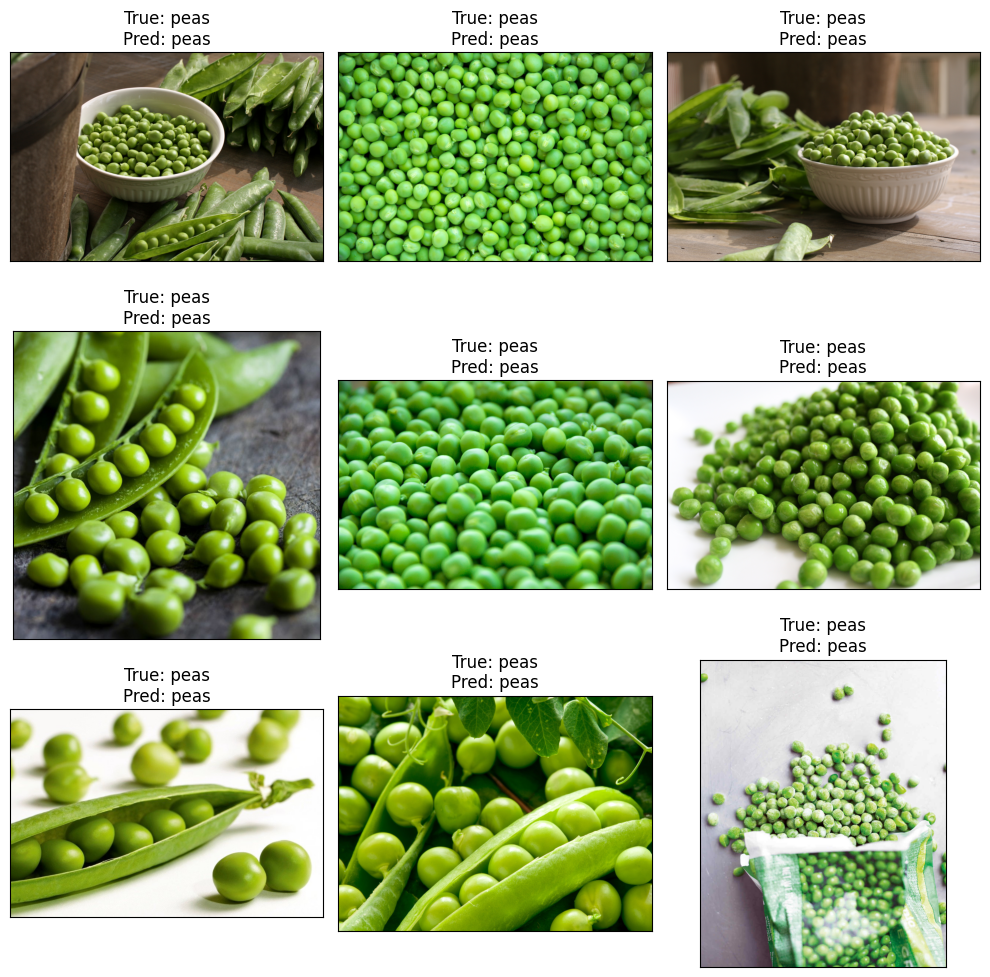

In [70]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(test_df.image_path.iloc[i]))
  ax.set_title(f"True: {test_df.label.iloc[i]}\nPred: {pred[i]}", fontsize = 12)
plt.tight_layout()
plt.show()

